<a href="https://colab.research.google.com/github/gibril1435/Data-Mining/blob/main/Copy_of_k_means.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
!pip install kagglehub

In [ ]:
!cp kaggle.json ~/.kaggle/
!chmod 600 ~/.kaggle/kaggle.json

cp: cannot stat 'kaggle.json': No such file or directory
chmod: cannot access '/root/.kaggle/kaggle.json': No such file or directory


#Download Dataset dari Kaggle

In [ ]:
import kagglehub

# Download latest version
path = kagglehub.dataset_download("kandij/mall-customers")

print("Path to dataset files:", path)

100%|██████████| 1.56k/1.56k [00:00<00:00, 555kB/s]

Extracting files...
Path to dataset files: /root/.cache/kagglehub/datasets/kandij/mall-customers/versions/1


# Import Library

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.cluster import KMeans
from sklearn.preprocessing import StandardScaler


# Load Dataset

In [ ]:
import os

base_path = "/root/.cache/kagglehub/datasets/kandij/mall-customers"
for root, dirs, files in os.walk(base_path):
    for file in files:
        print(os.path.join(root, file))

/root/.cache/kagglehub/datasets/kandij/mall-customers/1.complete
/root/.cache/kagglehub/datasets/kandij/mall-customers/versions/1/Mall_Customers.csv


In [ ]:
df = pd.read_csv("/root/.cache/kagglehub/datasets/kandij/mall-customers/versions/1/Mall_Customers.csv")
df.head()


,CustomerID,Genre,Age,Annual Income (k$),Spending Score (1-100)
0,1,Male,19,15,39
1,2,Male,21,15,81
2,3,Female,20,16,6
3,4,Female,23,16,77
4,5,Female,31,17,40


# Seleksi Fitur untuk Clustering

In [ ]:
X = df[['Annual Income (k$)', 'Spending Score (1-100)']].values

# Standarisasi Data

In [ ]:
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

# Elbow Method

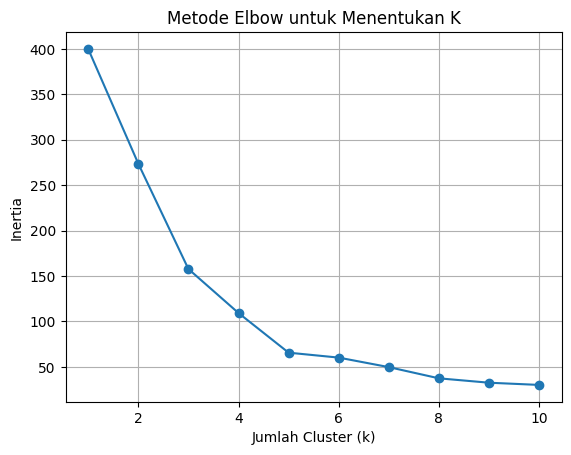

In [ ]:
inertia = []

for k in range(1, 11):
    km = KMeans(n_clusters=k, random_state=42)
    km.fit(X_scaled)
    inertia.append(km.inertia_)

plt.plot(range(1, 11), inertia, marker='o')
plt.xlabel('Jumlah Cluster (k)')
plt.ylabel('Inertia')
plt.title('Metode Elbow untuk Menentukan K')
plt.grid(True)
plt.show()

# Training K-Means

In [ ]:
kmeans = KMeans(n_clusters=5, random_state=42)
y_pred = kmeans.fit_predict(X_scaled)

In [ ]:
df['Cluster'] = y_pred
df.head()

,CustomerID,Genre,Age,Annual Income (k$),Spending Score (1-100),Cluster
0,1,Male,19,15,39,4
1,2,Male,21,15,81,2
2,3,Female,20,16,6,4
3,4,Female,23,16,77,2
4,5,Female,31,17,40,4


# Visualisasi Cluster 2D

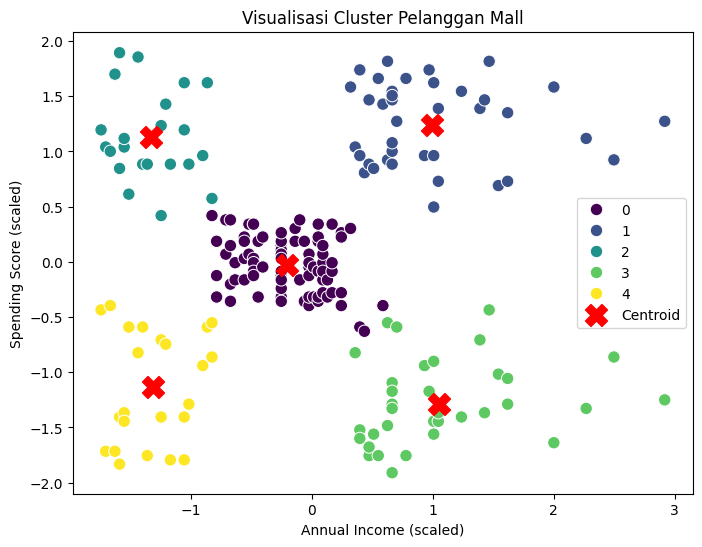

In [ ]:
plt.figure(figsize=(8,6))
sns.scatterplot(
    x=X_scaled[:, 0],
    y=X_scaled[:, 1],
    hue=y_pred,
    palette='viridis',
    s=80
)

centroids = kmeans.cluster_centers_
plt.scatter(centroids[:, 0], centroids[:, 1],
            s=250, c='red', marker='X', label='Centroid')

plt.title("Visualisasi Cluster Pelanggan Mall")
plt.xlabel("Annual Income (scaled)")
plt.ylabel("Spending Score (scaled)")
plt.legend()
plt.show()

In [ ]:
cluster_summary = df.groupby("Cluster")[['Age','Annual Income (k$)','Spending Score (1-100)']].mean()
cluster_summary

,Age,Annual Income (k$),Spending Score (1-100)
Cluster,,,
0,42.716049,55.296296,49.518519
1,32.692308,86.538462,82.128205
2,25.272727,25.727273,79.363636
3,41.114286,88.200000,17.114286
4,45.217391,26.304348,20.913043


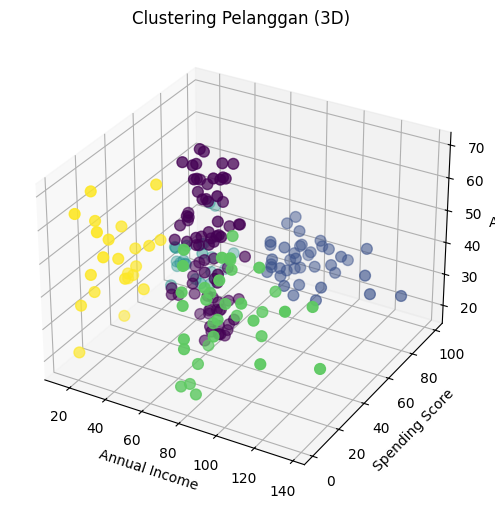

In [ ]:
from mpl_toolkits.mplot3d import Axes3D

fig = plt.figure(figsize=(9,6))
ax = fig.add_subplot(111, projection='3d')

ax.scatter(
    df['Annual Income (k$)'],
    df['Spending Score (1-100)'],
    df['Age'],
    c=y_pred, cmap='viridis', s=60
)

ax.set_xlabel("Annual Income")
ax.set_ylabel("Spending Score")
ax.set_zlabel("Age")
plt.title("Clustering Pelanggan (3D)")
plt.show()